In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, ttest_1samp, f_oneway, pearsonr, spearmanr
from sklearn.model_selection import train_test_split

df = pd.read_csv("wine_quality_merged.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Le but de ce projet est de développer un modéle qui permet de dire si un vin vhino verde portuguai est rouge ou blanc avec seulement les caractéristiques physico-chimiques des vins. Donc la premiére étape est de supprimer la varible de qualité.

In [130]:
df.drop("quality", axis=1, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,white


Regardons maintenant si il y a des valeurs manquantes.

In [131]:
df.isna().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  type 
False          False             False        False           False      False                False                 False    False  False      False    False    6497
Name: count, dtype: int64

On observe aucune valeurs manquante.

# I) Description des variables

-fixed acidity: Concentration massique en acide tartrique (g/dm3 = g/l) - continue

-volatile acidity: Concentration massique en acide acétique (g/dm3 = g/l) - continue 

-citric acid: Concentration massique en acide citrique (g/dm3 = g/l) - continue

-residual sugar: Concentration massique en sucre résiduelle (g/dm3 = g/l) - continue

-chlorides: Concentration massique en chlorure de sodium (NaCl) (g/dm3 = g/l) - continue

-free sulfur dioxide: Concentration massique en SO2 libre (g/dm3 = g/l) - continue

-total sulfur dioxide: Concentration massique en SO2 totale (g/dm3 = g/l) - continue

-density: Densité du vin (g/cm3) - continue

-pH: pH du vin (sans unité) - continue

-sulphates: Concentrattion massique en sulfates (SO42-) (g/dm3 = g/l) - continue

-alcohol: Degrés d'alcool (% volumique) - continue

-type: Le type de vin (rouge ou blanc) - discret (target)

Maintenant, comme le vin vhino verde est un vin spéciale qui doit avoir des conditions stricte aux yeux de la loi portugaise, on doit trouver sur internet avec des sources fiables les conditions pour appelée un vin vhino verde. Voilà les conditions avec les citations.

BLANC:

-degrés d'alcool entre 8 et 14 degrés

-acidité fixe minimale de 4.5 g/l

-acidité volatile ne dépassant pas 1,08 g d’acide acétique/L

-l'acide citrique ne doit pas dépasser de 1 g/l

-La concentration en NaCl ne doit pas dépasser 1 g/l

-SO2 totale: Si le vin à <= 5 g/l de sucre résiduelle, le SO2 totale doit être inférieur à 210 mg/l. Si le sucre résiduelle est > 5g/l, le vin doit avoir moins de 300 mg/l.

-Sulfates inférieur à 2 g/l.

ROUGE:

-acidité volatile ne doit pas dépasser 1,20 g d’acide acétique/L

-SO2 totale: Si le vin à <= 5 g/l de sucre résiduelle, le SO2 totale doit être inférieur à 160 mg/l. Si le sucre résiduelle est > 5g/l, le vin doit avoir moins de 210 mg/l.

-Le reste est identique au blanc.

citations: 

-https://diariodarepublica.pt/dr/detalhe/decreto-lei/10-150313

-https://webgate.ec.europa.eu/eambrosia-api/api/v1/attachments/16925

-https://www.ivv.gov.pt/np4/89/

Supprimons maintenant les vins qui ne correspond pas à ces crtiéres.

<Axes: xlabel='fixed acidity', ylabel='Count'>

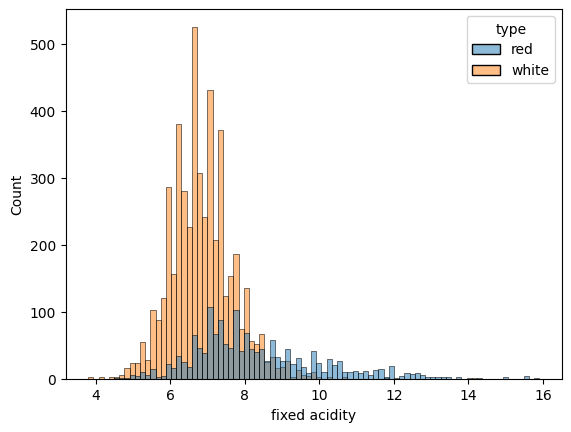

In [132]:
sns.histplot(data=df, x="fixed acidity", hue="type")

In [133]:
# Seuils AOP utilisés (à adapter si ton référentiel évolue)
_AOP = {
    "common": {
        "alcohol_min": 8.5,
        "alcohol_max": 14.0,
        "fixed_acidity_min": 4.5,  # g/L (acide tartrique)
        "chlorides_max": 1.0,  # g/L NaCl
        "citric_acid_max": 1.0,  # g/L
    },
    "white": {
        "volatile_acidity_max": 1.08,  # g/L acide acétique
        "so2_total_max_dry": 210,  # mg/L si sucre ≤ 5 g/L
        "so2_total_max_sweet": 300,  # mg/L si sucre > 5 g/L
    },
    "red": {
        "volatile_acidity_max": 1.20,  # g/L acide acétique
        "so2_total_max_dry": 160,  # mg/L si sucre ≤ 5 g/L
        "so2_total_max_sweet": 210,  # mg/L si sucre > 5 g/L
    },
}

_REQUIRED = [
    "type",
    "alcohol",
    "fixed acidity",
    "volatile acidity",
    "residual sugar",
    "chlorides",
    "total sulfur dioxide",
    "citric acid",
]


def filter_vinho_verde_aop(
    df: pd.DataFrame, return_mask: bool = False
) -> pd.DataFrame | pd.Series:
    """
    Filtre les lignes conformes AOP Vinho Verde, blanc ou rouge.
    - df doit contenir les colonnes listées dans _REQUIRED
    - return_mask=True renvoie un masque booléen au lieu du DataFrame filtré
    """
    missing = [c for c in _REQUIRED if c not in df.columns]
    if missing:
        raise ValueError(f"Colonnes manquantes: {missing}")

    d = df.copy()
    color = d["type"].astype(str).str.lower().str.strip()

    # Règles communes
    common = (
        d["alcohol"].between(
            _AOP["common"]["alcohol_min"],
            _AOP["common"]["alcohol_max"],
            inclusive="both",
        )
        & (d["fixed acidity"] >= _AOP["common"]["fixed_acidity_min"])
        & (d["chlorides"] <= _AOP["common"]["chlorides_max"])
        & (d["citric acid"] <= _AOP["common"]["citric_acid_max"])
    )

    low_sugar = (
        d["residual sugar"] <= 5
    )  # définition "sec" opérationnelle pour les plafonds SO2

    # Blanc
    white_mask = (
        color.eq("white")
        & (d["volatile acidity"] <= _AOP["white"]["volatile_acidity_max"])
        & (
            (
                low_sugar
                & (d["total sulfur dioxide"] <= _AOP["white"]["so2_total_max_dry"])
            )
            | (
                ~low_sugar
                & (d["total sulfur dioxide"] <= _AOP["white"]["so2_total_max_sweet"])
            )
        )
    )

    # Rouge
    red_mask = (
        color.eq("red")
        & (d["volatile acidity"] <= _AOP["red"]["volatile_acidity_max"])
        & (
            (
                low_sugar
                & (d["total sulfur dioxide"] <= _AOP["red"]["so2_total_max_dry"])
            )
            | (
                ~low_sugar
                & (d["total sulfur dioxide"] <= _AOP["red"]["so2_total_max_sweet"])
            )
        )
    )

    mask = common & (white_mask | red_mask)
    return mask if return_mask else df[mask].copy()


df = filter_vinho_verde_aop(df)
len(df)

6443

In [134]:
6497 - 6443

54

Dans ce jeu de données, 54 vin ne sont plus considérée aujourd'hui comme des vins vhino verde. On observe que les concentration en SO2 ainsi que la densité ne sont exprimée à la même unité que les autres concentrations. On va donc faire les conversions.

In [135]:
df["free sulfur dioxide"] *= 0.001
df["total sulfur dioxide"] *= 0.001
df["density"] *= 1000

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,0.011,0.034,997.80,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,0.025,0.067,996.80,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,0.015,0.054,997.00,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,0.017,0.060,998.00,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,0.011,0.034,997.80,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,0.024,0.092,991.14,3.27,0.50,11.2,white
6493,6.6,0.32,0.36,8.0,0.047,0.057,0.168,994.90,3.15,0.46,9.6,white
6494,6.5,0.24,0.19,1.2,0.041,0.030,0.111,992.54,2.99,0.46,9.4,white
6495,5.5,0.29,0.30,1.1,0.022,0.020,0.110,988.69,3.34,0.38,12.8,white


In [136]:
train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
)
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
2618,8.3,0.14,0.26,1.5,0.049,0.056,0.189,994.60,3.21,0.62,9.5,white
2359,6.9,0.18,0.38,8.1,0.049,0.044,0.176,995.80,3.30,0.54,9.8,white
4924,6.8,0.25,0.28,5.0,0.035,0.042,0.126,990.48,3.12,0.38,12.6,white
6351,5.1,0.25,0.36,1.3,0.035,0.040,0.078,989.10,3.23,0.64,12.1,white
153,7.5,0.60,0.03,1.8,0.095,0.025,0.099,995.00,3.35,0.54,10.1,red
...,...,...,...,...,...,...,...,...,...,...,...,...
3803,7.6,0.27,0.33,2.0,0.059,0.019,0.175,994.40,3.22,0.56,9.9,white
5232,6.6,0.30,0.25,8.0,0.036,0.021,0.124,993.62,3.06,0.38,10.8,white
5267,6.5,0.27,0.26,11.0,0.030,0.002,0.082,994.02,3.07,0.36,11.2,white
5431,6.8,0.31,0.19,3.5,0.086,0.030,0.130,993.00,2.83,0.44,9.6,white



# II) Analyse statistiques

## II.1) Analyse des effecctifs du type de vin.

In [137]:
train_set["type"].value_counts()

type
white    3903
red      1251
Name: count, dtype: int64

On observe qu'il y a plus de vin blanc que de vin rouge. On va donc utiliser comme métrique un f1_score. Il est connue que le raisin blanc à plus de sucre que le rouge donc on peut avoir potentiellement avoir plus de sucre résiduelle dans les vins blancs que dans les rouges. Il est aussi connue que les blancs contienne plus de de SO2 et de sulfates et généralement les vin rouge sont plus alcoolisé que les vins blancs. On va donc commencer notre analyse exploratoire en analysant ces information. Pour chaque variable on va faire une analyse 

## II.2) Analyse des variables potentiellement intéréssantes

### II.2.1) Analyse univarié

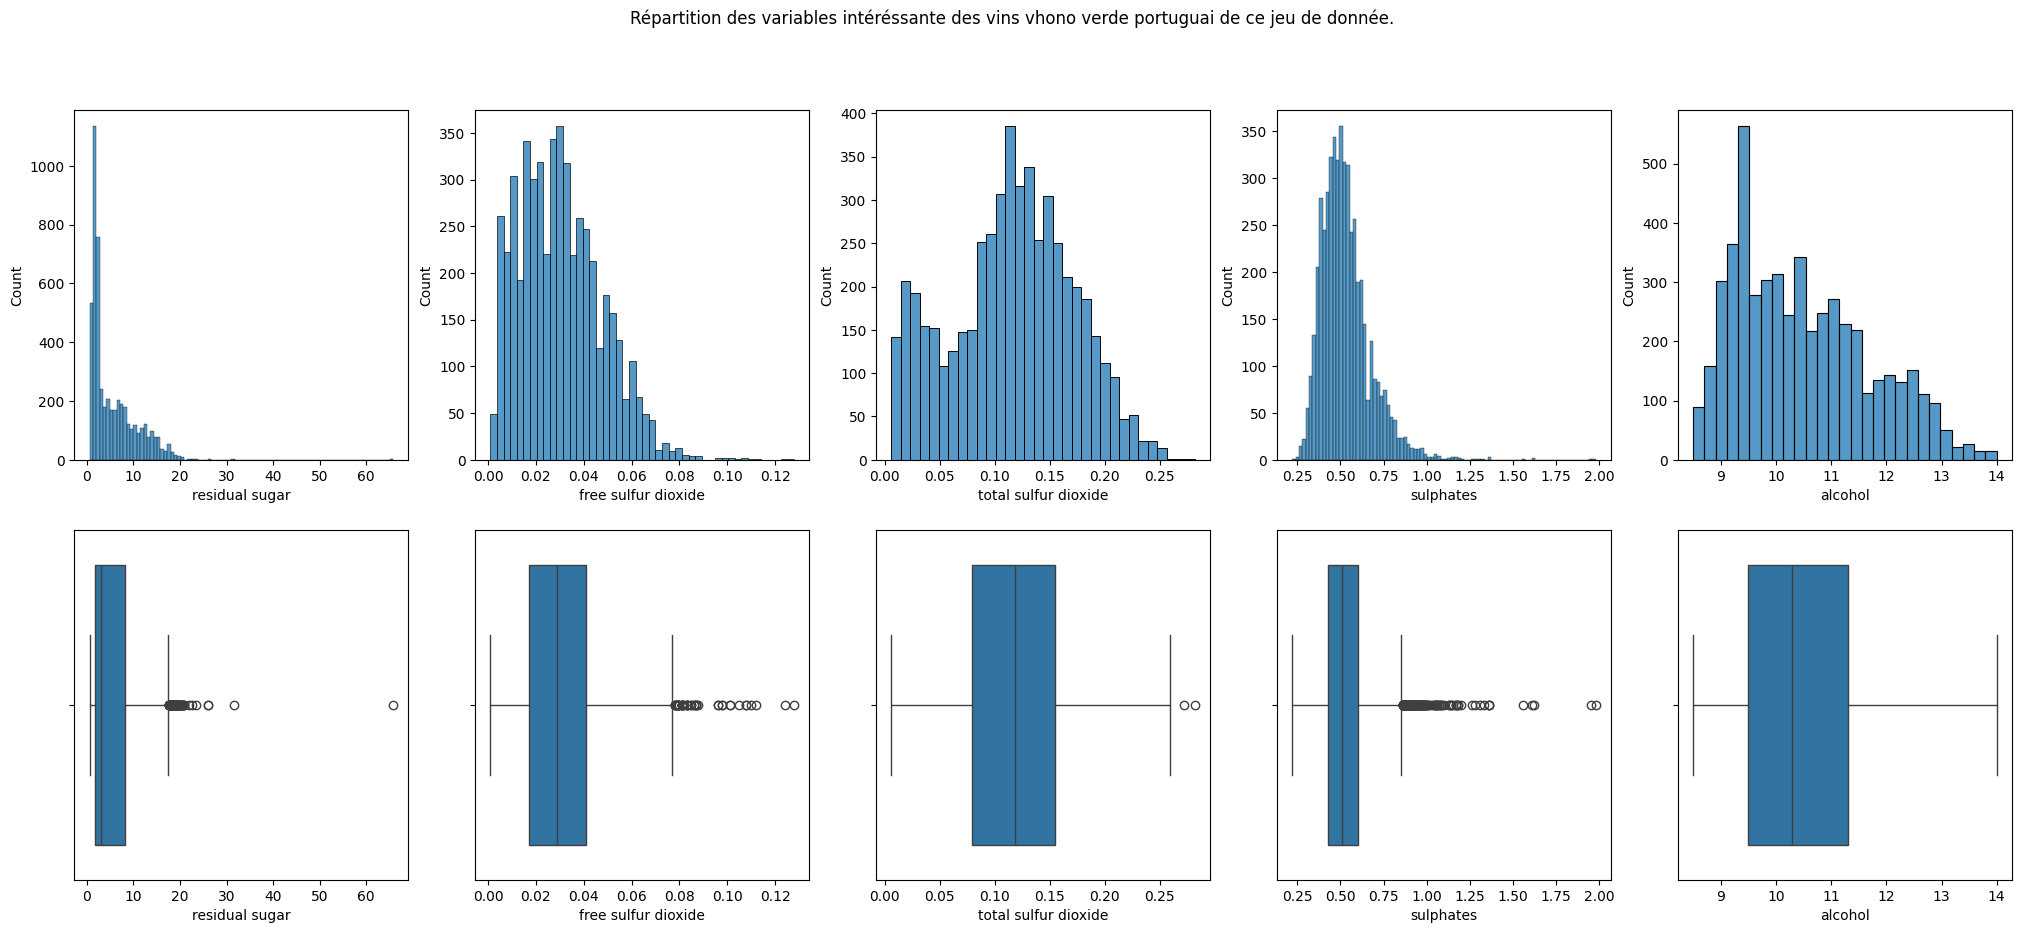

,residual sugar,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
count,5154.000000,5154.000000,5154.000000,5154.000000,5154.000000
mean,5.490114,0.030383,0.115612,0.530691,10.489071
std,4.789739,0.017169,0.055617,0.145428,1.183210
min,0.600000,0.001000,0.006000,0.220000,8.500000
25%,1.800000,0.017000,0.079000,0.430000,9.500000
50%,3.100000,0.029000,0.118000,0.510000,10.300000
75%,8.100000,0.041000,0.155000,0.600000,11.300000
max,65.800000,0.128000,0.282000,1.980000,14.000000


In [138]:
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(25, 10)
plt.suptitle(
    "Répartition des variables intéréssante des vins vhono verde portuguai de ce jeu de donnée."
)
sns.histplot(data=train_set, x="residual sugar", ax=ax[0, 0])
sns.boxplot(data=train_set, x="residual sugar", ax=ax[1, 0])
sns.histplot(data=train_set, x="free sulfur dioxide", ax=ax[0, 1])
sns.boxplot(data=train_set, x="free sulfur dioxide", ax=ax[1, 1])
sns.histplot(data=train_set, x="total sulfur dioxide", ax=ax[0, 2])
sns.boxplot(data=train_set, x="total sulfur dioxide", ax=ax[1, 2])
sns.histplot(data=train_set, x="sulphates", ax=ax[0, 3])
sns.boxplot(data=train_set, x="sulphates", ax=ax[1, 3])
sns.histplot(data=train_set, x="alcohol", ax=ax[0, 4])
sns.boxplot(data=train_set, x="alcohol", ax=ax[1, 4])
plt.show()
train_set[
    [
        "residual sugar",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "sulphates",
        "alcohol",
    ]
].describe()

Les vins vhino verde portuguai de ce jeu de donnée ont en moyenne 5.472 g/l de sucre résiduelle, 0.031 g/l de SO2 libre, 0.116 g/l de SO2 total, 0.531 g/l de sulfates et ont un degrés d'alcool de 10.484°. On observe que seul la concentration en sucre résiduelle ne suit pas une loi normale. On observe un vin beaucoup plus concentré en sucre résiduelle qui est considérée comme un outlier mais cela ne veut rien dire. Au delà de 45 g/l de sucre résiduel, le vin est du style vendange tardive. Il éxiste d'autre outliers pour le sucre résiduelle et les autres variables mais elles sont proche les uns des autre. 

### II.2.2) Analyse multivarié avec la target

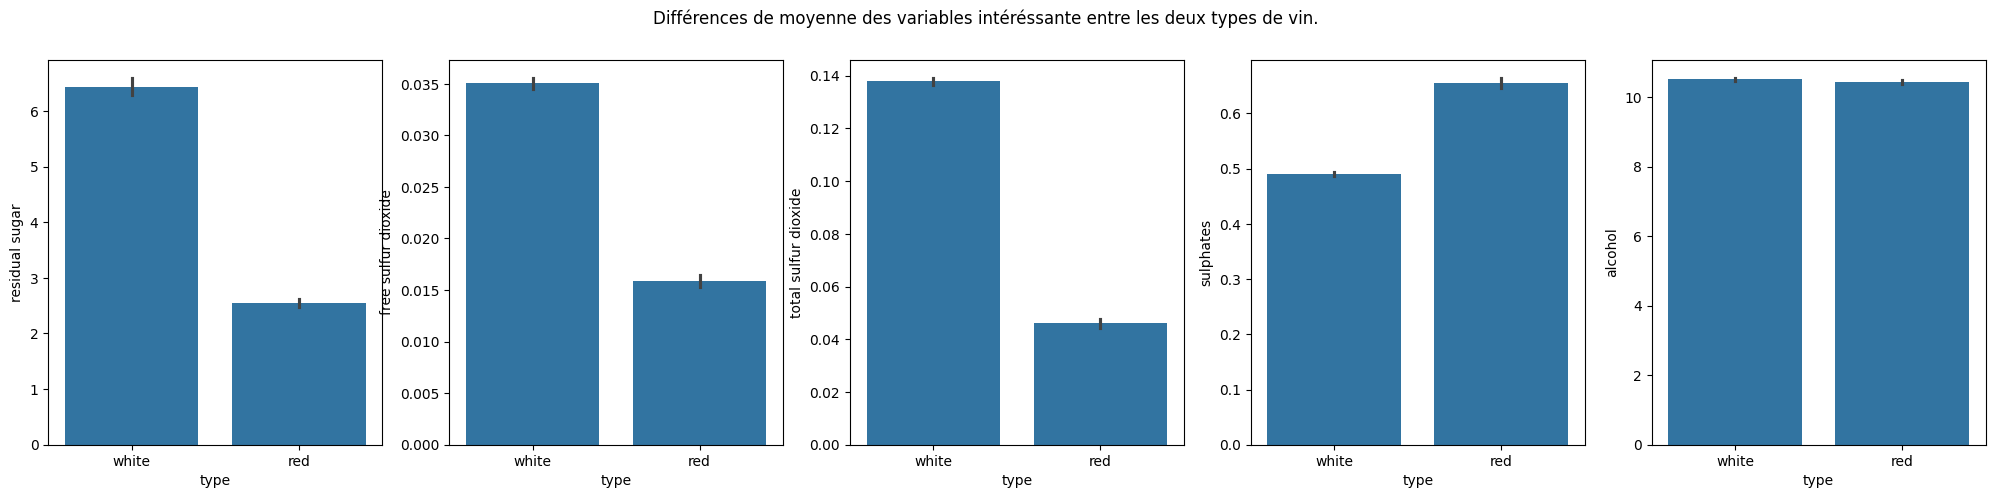

In [139]:
fig, ax = plt.subplots(1, 5)
fig.set_size_inches(25, 5)
plt.suptitle(
    "Différences de moyenne des variables intéréssante entre les deux types de vin."
)
sns.barplot(data=train_set, y="residual sugar", x="type", ax=ax[0])
sns.barplot(data=train_set, y="free sulfur dioxide", x="type", ax=ax[1])
sns.barplot(data=train_set, y="total sulfur dioxide", x="type", ax=ax[2])
sns.barplot(data=train_set, y="sulphates", x="type", ax=ax[3])
sns.barplot(data=train_set, y="alcohol", x="type", ax=ax[4])
plt.show()

On observe que les vins blanc vhino verde ont en moyenne plus de sucre résiduelle, de SO2 libre et totale mais moins de sulfates que les vins rouges. Il y a en moyenne un degré d'alcool similaires pour les deux types. Passons aux répartitions. 

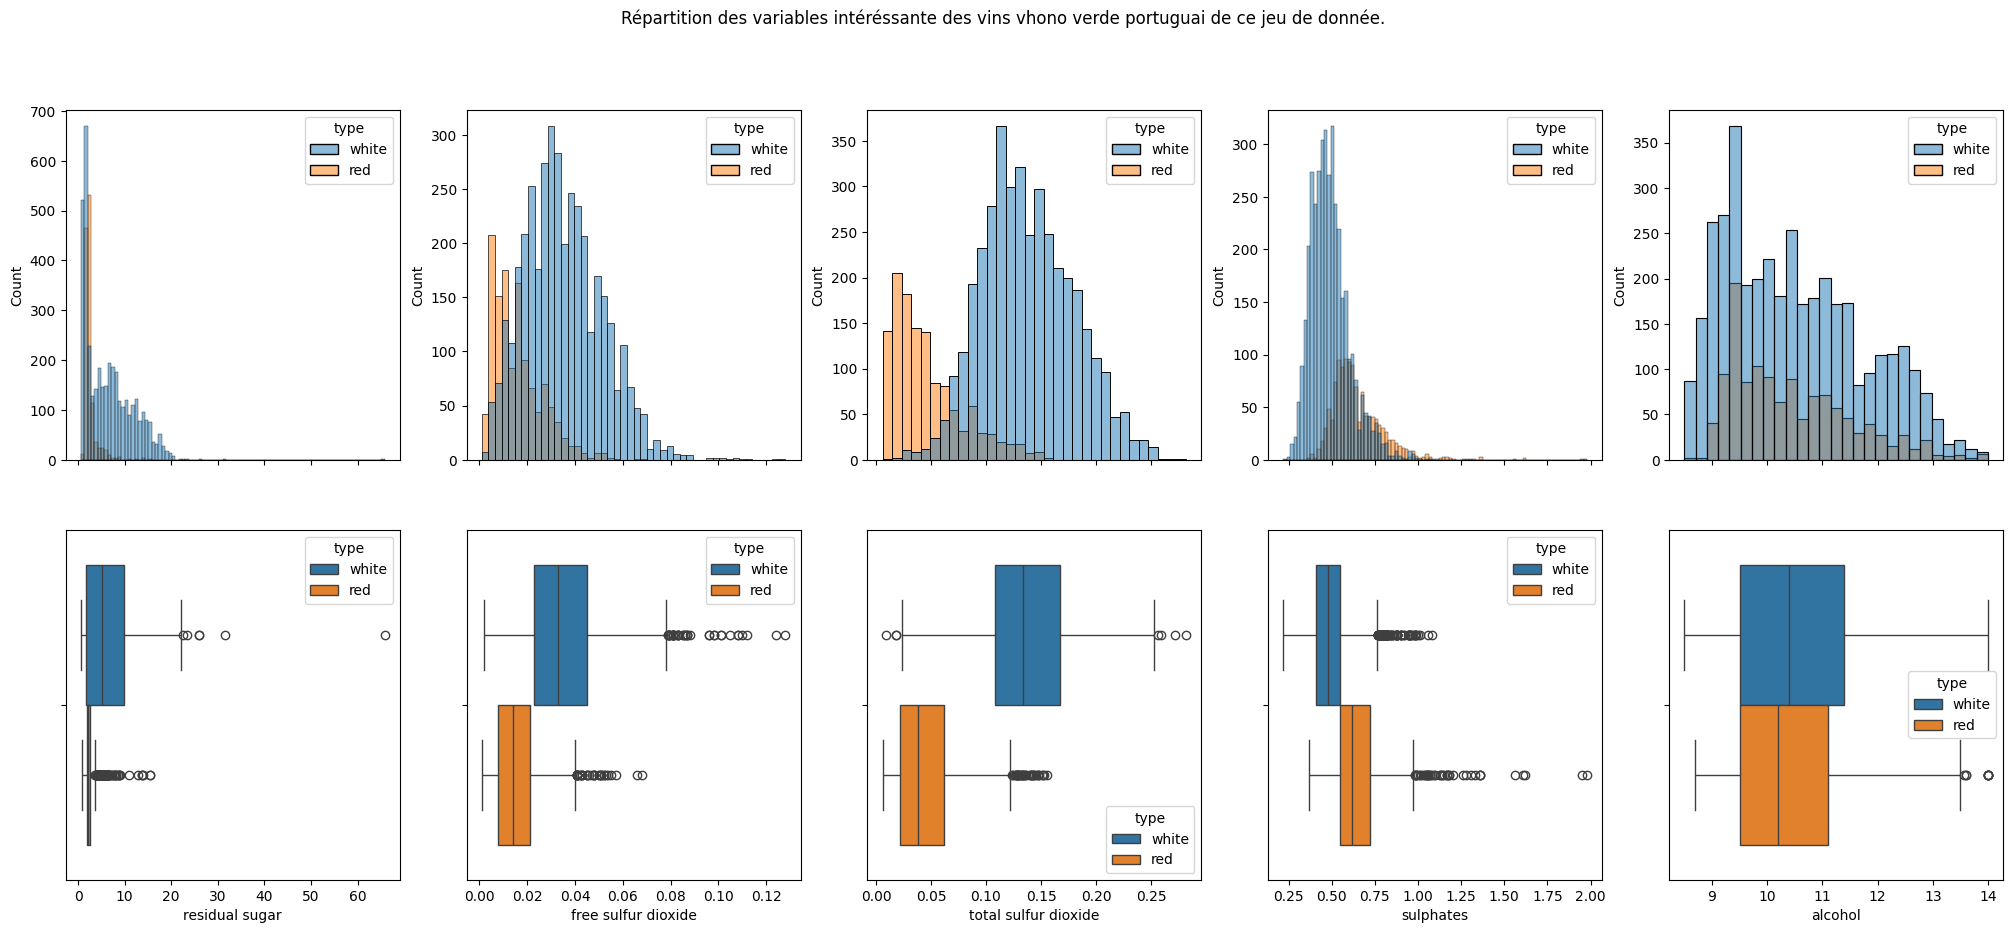

In [140]:
fig, ax = plt.subplots(2, 5, sharex="col")
fig.set_size_inches(25, 10)
plt.suptitle(
    "Répartition des variables intéréssante des vins vhono verde portuguai de ce jeu de donnée."
)
sns.histplot(data=train_set, x="residual sugar", hue="type", ax=ax[0, 0])
sns.boxplot(data=train_set, x="residual sugar", hue="type", ax=ax[1, 0])
sns.histplot(data=train_set, x="free sulfur dioxide", hue="type", ax=ax[0, 1])
sns.boxplot(data=train_set, x="free sulfur dioxide", hue="type", ax=ax[1, 1])
sns.histplot(data=train_set, x="total sulfur dioxide", hue="type", ax=ax[0, 2])
sns.boxplot(data=train_set, x="total sulfur dioxide", hue="type", ax=ax[1, 2])
sns.histplot(data=train_set, x="sulphates", hue="type", ax=ax[0, 3])
sns.boxplot(data=train_set, x="sulphates", hue="type", ax=ax[1, 3])
sns.histplot(data=train_set, x="alcohol", hue="type", ax=ax[0, 4])
sns.boxplot(data=train_set, x="alcohol", hue="type", ax=ax[1, 4])
plt.show()

On observe que les deux histogrammes et boxplots pour les quatres premiére variables sont décalés et on commence à voir une séparation. Par contre pour le cas de l'alcool on a une superposition totale des deux histogrammes ainsi que des boxplots. On commence à avoir une belle séparation avec la concentration totale en SO2. Avant de passer aux tests d'hypothéses il faut validé les conditions d'utilisation.

In [141]:
train_set.groupby("type")[
    [
        "residual sugar",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "sulphates",
        "alcohol",
    ]
].std()

,residual sugar,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
type,,,,,
red,1.382819,0.010302,0.031533,0.16065,1.054768
white,5.100361,0.016305,0.041494,0.11453,1.221067


1: Tous les caractéristiques physico-chimiques de ce jeu de données pour un vin ne dépends pas des autres.

2: Ce sont tous des vins de type vhino verde portuguai. Ils sont par conséquent tous issues de la même population.

3: Il y a plus de 30 points par catégorie de la target

4: On voit que la différence d'écart-types est trop grande pour utiliser un test de student pour le sucre résiduel mais pas pour les autres variables.

In [142]:
print(
    "H0: Les vins rouge ont en moyenne la même concentration en sucre que les vins blanc."
)

alpha = 0.02

p_value = ttest_ind(
    train_set.query("`type` == 'red'")["residual sugar"],
    train_set.query("`type` == 'white'")["residual sugar"],
    equal_var=False,
).pvalue

if p_value < alpha:
    print("Nous avons assez d'évidence pour rejeter H0.")
else:
    print("Nous n'avons pas assez d'évidence pour rejeter H0.")

H0: Les vins rouge ont en moyenne la même concentration en sucre que les vins blanc.
Nous avons assez d'évidence pour rejeter H0.


In [143]:
print(
    "H0: Les vins rouge ont en moyenne la même concentration en SO2 libre que les vins blanc."
)

alpha = 0.02

p_value = ttest_ind(
    train_set.query("`type` == 'red'")["free sulfur dioxide"],
    train_set.query("`type` == 'white'")["free sulfur dioxide"],
).pvalue

if p_value < alpha:
    print("Nous avons assez d'évidence pour rejeter H0.")
else:
    print("Nous n'avons pas assez d'évidence pour rejeter H0.")

H0: Les vins rouge ont en moyenne la même concentration en SO2 libre que les vins blanc.
Nous avons assez d'évidence pour rejeter H0.


In [144]:
print(
    "H0: Les vins rouge ont en moyenne la même concentration en SO2 total que les vins blanc."
)

alpha = 0.02

p_value = ttest_ind(
    train_set.query("`type` == 'red'")["total sulfur dioxide"],
    train_set.query("`type` == 'white'")["total sulfur dioxide"],
).pvalue

if p_value < alpha:
    print("Nous avons assez d'évidence pour rejeter H0.")
else:
    print("Nous n'avons pas assez d'évidence pour rejeter H0.")

H0: Les vins rouge ont en moyenne la même concentration en SO2 total que les vins blanc.
Nous avons assez d'évidence pour rejeter H0.


In [145]:
print(
    "H0: Les vins rouge ont en moyenne la même concentration en sulfates que les vins blanc."
)

alpha = 0.02

p_value = ttest_ind(
    train_set.query("`type` == 'red'")["sulphates"],
    train_set.query("`type` == 'white'")["sulphates"],
).pvalue

if p_value < alpha:
    print("Nous avons assez d'évidence pour rejeter H0.")
else:
    print("Nous n'avons pas assez d'évidence pour rejeter H0.")

H0: Les vins rouge ont en moyenne la même concentration en sulfates que les vins blanc.
Nous avons assez d'évidence pour rejeter H0.


In [146]:
print("H0: Les vins rouge ont en moyenne lae même degrés d'alcool que les vins blanc.")

alpha = 0.02

p_value = ttest_ind(
    train_set.query("`type` == 'red'")["alcohol"],
    train_set.query("`type` == 'white'")["alcohol"],
).pvalue

if p_value < alpha:
    print("Nous avons assez d'évidence pour rejeter H0.")
else:
    print("Nous n'avons pas assez d'évidence pour rejeter H0.")

H0: Les vins rouge ont en moyenne lae même degrés d'alcool que les vins blanc.
Nous n'avons pas assez d'évidence pour rejeter H0.


Sans surprise on a rejeter H0 pour les la concentratioon en sucre résiduelle, SO2 libre et totale et concentration en sulfate. On n'a pas réussi à rejeter H0 pour l'alcool. Par conséquent on pourrat supprimer cette variable durant le préprocéssing.

### II.2.3) Analyse des variables intéréssante entre-eux.

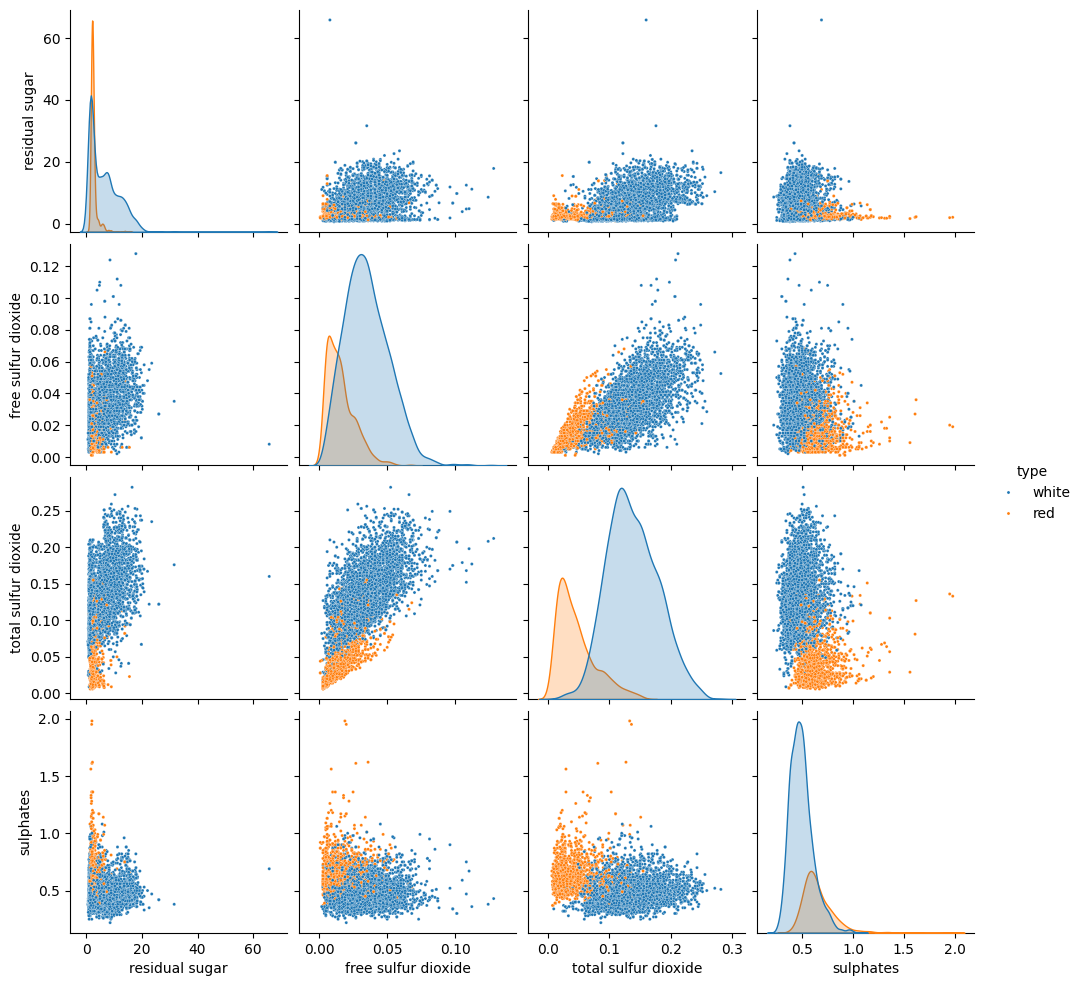

In [147]:
fig = sns.pairplot(
    train_set[
        [
            "residual sugar",
            "free sulfur dioxide",
            "total sulfur dioxide",
            "sulphates",
            "type",
        ]
    ],
    hue="type",
    plot_kws={"s": 5},
)
plt.show()

On observe qu'on commence à avoir une séparation intéréssante avec les relations entre "free sulfur dioxide" et "total sulfur dioxide" et entre "sulpahtes" et "total sulfur dioxide". Maitenant regardons la surface 3D entrela concentration en sulfates, SO2 libre et SO2 totale.

In [148]:
fig = px.scatter_3d(
    train_set,
    x="total sulfur dioxide",
    y="free sulfur dioxide",
    z="sulphates",
    color="type",
)
fig.update_traces(
    marker=dict(size=4, line=dict(width=2)),
    selector=dict(mode="markers"),
)
fig.update_layout(
    title_text="Relation entre la concentration en sulfates, SO2 libre et SO2 totale pour les deux types de vins",
    title_x=0.5,
)

On voit qu'on peut commencer à avoir un assez bon modéles avec ces trois variables mais il y a encore de la superposition. On va donc continuer à analyser les autres variables.